<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210713%5D_Polynomial_Regression_for_multipleX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [22]:
!git clone https://github.com/BingHungLee/Dataset.git

Cloning into 'Dataset'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [23]:
cd /content/Dataset

/content/Dataset


In [24]:
df= pd.read_csv("Helix_20190703.csv")
df.head(19)

,h,den,ve,k,vis,sp,d,angle
0,7001.73,1000.000,1.4569,0.53430,0.72400,0.99900,0.01905,0.3840
1,6776.87,1000.000,0.8931,0.53430,0.73065,0.99900,0.01905,0.6283
2,8695.88,1000.000,0.9510,0.50470,1.22115,1.01005,0.01905,0.6981
3,990.20,639.500,1.0500,0.08000,0.21500,0.65700,0.02540,0.1047
4,541.68,866.500,0.8600,0.06600,3.90000,0.59100,0.02540,0.1745
5,421.42,865.000,0.6000,0.06600,3.90000,0.59250,0.02540,0.2094
6,555.12,844.500,0.9400,0.06300,2.40000,0.62850,0.02540,0.1396
7,986.64,684.000,1.1100,0.06550,0.27500,0.69800,0.02540,0.1571
8,628.58,807.000,0.9800,0.05800,1.30000,0.68950,0.02540,0.1047
9,1086.32,646.500,1.2800,0.07800,0.22500,0.67500,0.02540,0.1047


## Retrieve Data and Split it to X and Y dataframe

In [25]:
input_x = np.array(df[['den','ve','k','vis','sp','d','angle']])
input_y = np.array(df[['h']])

print("input_x :", input_x)
print("input_y :", input_y)

input_x : [[1.00000e+03 1.45690e+00 5.34300e-01 7.24000e-01 9.99000e-01 1.90500e-02
  3.84000e-01]
 [1.00000e+03 8.93100e-01 5.34300e-01 7.30650e-01 9.99000e-01 1.90500e-02
  6.28300e-01]
 [1.00000e+03 9.51000e-01 5.04700e-01 1.22115e+00 1.01005e+00 1.90500e-02
  6.98100e-01]
 [6.39500e+02 1.05000e+00 8.00000e-02 2.15000e-01 6.57000e-01 2.54000e-02
  1.04700e-01]
 [8.66500e+02 8.60000e-01 6.60000e-02 3.90000e+00 5.91000e-01 2.54000e-02
  1.74500e-01]
 [8.65000e+02 6.00000e-01 6.60000e-02 3.90000e+00 5.92500e-01 2.54000e-02
  2.09400e-01]
 [8.44500e+02 9.40000e-01 6.30000e-02 2.40000e+00 6.28500e-01 2.54000e-02
  1.39600e-01]
 [6.84000e+02 1.11000e+00 6.55000e-02 2.75000e-01 6.98000e-01 2.54000e-02
  1.57100e-01]
 [8.07000e+02 9.80000e-01 5.80000e-02 1.30000e+00 6.89500e-01 2.54000e-02
  1.04700e-01]
 [6.46500e+02 1.28000e+00 7.80000e-02 2.25000e-01 6.75000e-01 2.54000e-02
  1.04700e-01]
 [7.12000e+02 9.50000e-01 7.05000e-02 3.45000e-01 6.62000e-01 2.54000e-02
  1.39600e-01]
 [9.86900e+

## Normalization

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
input_x = scaler.fit_transform(input_x)

print("input_x :", input_x)

input_x : [[1.         0.86207243 0.99177512 0.13812754 0.9780449  0.
  0.47067745]
 [1.         0.29486922 0.99177512 0.13993216 0.9780449  0.
  0.88237277]
 [1.         0.35311871 0.93014055 0.27303935 1.         0.
  1.        ]
 [0.         0.4527163  0.04580947 0.         0.2985297  1.
  0.        ]
 [0.629681   0.26156942 0.01665799 1.         0.16739519 1.
  0.11762723]
 [0.62552011 0.         0.01665799 1.         0.17037552 1.
  0.17644085]
 [0.56865465 0.34205231 0.01041124 0.59294437 0.24190344 1.
  0.05881362]
 [0.12343967 0.51307847 0.01561687 0.01628223 0.37999205 1.
  0.08830468]
 [0.46463245 0.38229376 0.         0.29443691 0.36310352 1.
  0.        ]
 [0.01941748 0.68410463 0.04164498 0.0027137  0.33429366 1.
  0.        ]
 [0.20110957 0.35211268 0.02602811 0.03527815 0.30846414 1.
  0.05881362]
 [0.96366158 0.19114688 0.46434149 0.44477612 0.83856547 0.
  0.        ]
 [0.9223301  0.39235412 0.54638209 0.06776119 0.78829724 0.
  0.08830468]
 [0.2038835  0.65392354 0.08

## Poly Regression Train

In [27]:
degree = 3
Po = PolynomialFeatures(degree)
X_poly = Po.fit_transform(input_x)
X_train,X_test,Y_train,Y_test =train_test_split(X_poly,input_y,test_size=0.2, random_state=101)
reg = LinearRegression().fit(X_train,Y_train)
test_predict = reg.predict(X_test)

In [28]:
X_poly

array([[1.        , 1.        , 0.86207243, ..., 0.        , 0.        ,
        0.10427259],
       [1.        , 1.        , 0.29486922, ..., 0.        , 0.        ,
        0.68699929],
       [1.        , 1.        , 0.35311871, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.98432732, 0.87525151, ..., 0.2942366 , 0.08657518,
        0.02547359],
       [1.        , 0.98104022, 0.39235412, ..., 0.23525447, 0.05534466,
        0.01302008],
       [1.        , 0.97789182, 0.93561368, ..., 0.20593192, 0.04240795,
        0.00873315]])

In [29]:
X_poly.shape

(20, 120)

In [30]:
X_test

array([[1.00000000e+00, 0.00000000e+00, 4.52716298e-01, 4.58094742e-02,
        0.00000000e+00, 2.98529704e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.04952046e-01,
        2.07386956e-02, 0.00000000e+00, 1.35149262e-01, 4.52716298e-01,
        0.00000000e+00, 2.09850793e-03, 0.00000000e+00, 1.36754888e-02,
        4.58094742e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.91199841e-02, 2.98529704e-01,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [31]:
Y_test = Y_test.flatten()
Y_test

array([ 990.2 ,  986.64, 8695.88, 6776.87])

In [32]:
test_predict = test_predict.flatten()
test_predict

array([1386.97443719, 1371.84689145, 9031.90920338, 5620.45661073])

In [33]:
Poly_result = pd.DataFrame(np.array([Y_test,test_predict]).transpose(),columns = ['real value','predict value'])
Poly_result

,real value,predict value
0,990.20,1386.974437
1,986.64,1371.846891
2,8695.88,9031.909203
3,6776.87,5620.456611


In [34]:
print("R2 :",r2_score(Y_test,test_predict))

R2 : 0.9629345165881487


In [35]:
print("reg.coef_ :", reg.coef_)
print("reg.coef_ shape :", reg.coef_.shape)
print("reg.intercept_ :", reg.intercept_)

reg.coef_ : [[ 6.71889211e-11 -6.88900386e+02  1.71227476e+03  6.88375965e+02
  -1.51985084e+03  3.41405754e+02  1.49252310e+02 -1.17788653e+03
   1.37561368e+03  2.02791282e+02  1.22910085e+03 -8.41338007e+02
   1.22036161e+02 -6.02098382e+02 -7.59089490e+02  1.99161840e+02
   8.56798808e+02 -1.84253899e+03  4.88323014e+02  9.09810722e+02
   5.94899699e+03 -2.67564108e+02  3.14659791e+02 -3.32333293e+02
   2.23556596e+02 -1.45154406e+03 -2.95606848e+02 -7.14684439e+02
   4.27228807e+02  5.19322062e+02 -6.65621130e+02  2.86429173e+02
  -1.61984064e+03  1.49252310e+02 -1.50368514e+03  2.10850093e+03
   2.44570626e+03  1.81187917e+03  1.91986430e+03 -4.84666972e+02
   1.10322320e+03  1.55410791e+03 -5.85426871e+02 -1.69286911e+03
   1.37654180e+03 -6.97219899e+02  8.88547640e+01 -6.23818336e+02
   6.24794571e+03  4.65876547e+02  4.32451100e+02  3.11006572e+02
   8.73455958e+02 -1.23408135e+03 -3.14552831e+02 -4.31964426e+02
   1.01017366e+03  3.64090280e+02 -3.37487792e+02  3.19164479e+0

Text(0, 0.5, 'predict value')

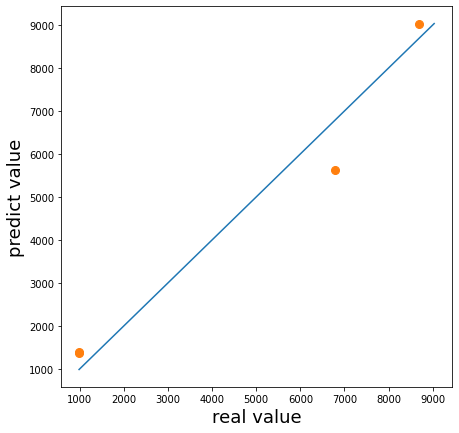

In [36]:
figLim = [np.array(min(np.min(Y_test), np.min(test_predict))),np.array(max(np.max(Y_test), np.max(test_predict)))]
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(1,1,1)
ax.plot(np.array(figLim), np.array(figLim))
ax.plot(Y_test, test_predict, '.', markersize = 16)
ax.set_xlabel('real value', fontsize = 18)
ax.set_ylabel('predict value', fontsize = 18)

## Poly Regression Predict

In [37]:
df= pd.read_csv("Helix_20190703_purewater.csv")
df.head(19)
input_x_new = np.array(df[['den','ve','k','vis','sp','d','angle']])
input_y_new = np.array(df[['h']])

#print("input_x :", input_x_new)
#print("input_y :", input_y_new)
scaler = MinMaxScaler(feature_range=(0,1))
input_x_new = scaler.fit_transform(input_x_new)

Po_new = PolynomialFeatures(degree)
X_poly_new = Po.fit_transform(input_x_new)
New_Predict = reg.predict(X_poly_new)

input_y_new = input_y_new.flatten()
New_Predict = New_Predict.flatten()
Poly_result_new = pd.DataFrame(np.array([input_y_new,New_Predict]).transpose(),columns = ['real value','predict value'])
Poly_result_new


,real value,predict value
0,7001.73,13148.831138
1,6776.87,5427.136110
2,8695.88,684.142777
3,4870.95,3567.189335
4,3113.40,-2934.710984
5,4587.49,3753.504189
6,2758.50,-412.396564
7,2051.84,-6850.912756


Text(0, 0.5, 'predict value')

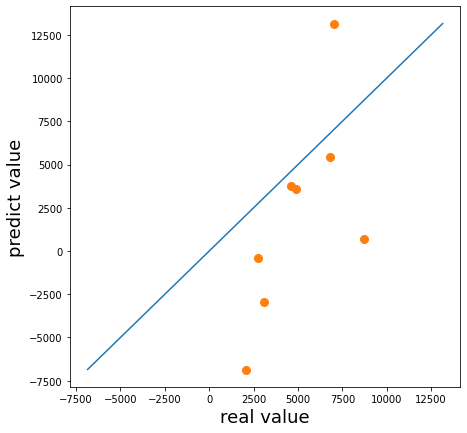

In [38]:
figLim = [np.array(min(np.min(input_y_new), np.min(New_Predict))),np.array(max(np.max(input_y_new), np.max(New_Predict)))]
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(1,1,1)
ax.plot(np.array(figLim), np.array(figLim))
ax.plot(input_y_new, New_Predict, '.', markersize = 16)
ax.set_xlabel('real value', fontsize = 18)
ax.set_ylabel('predict value', fontsize = 18)